In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
series=pd.Series.from_csv('required.csv',header=0)

In [12]:
series.head()

date
1996-11-01    53.0
1996-11-02    49.0
1996-11-03    56.0
1996-11-04    48.0
1996-11-05    29.0
Name: hum, dtype: float64

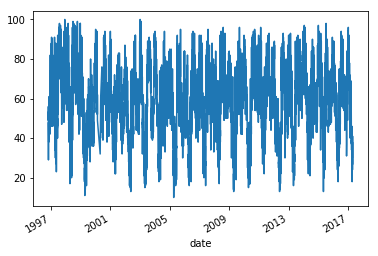

In [13]:
series.plot()
plt.show()

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

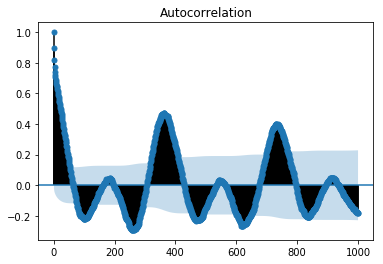

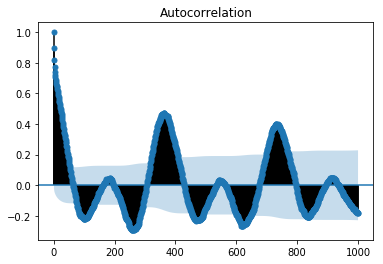

In [16]:
plot_acf(series, lags=1000)

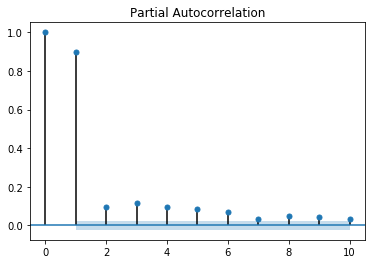

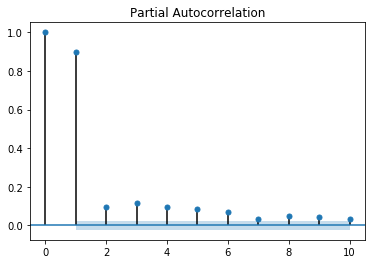

In [26]:
plot_pacf(series,lags=10)

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
size = int(len(series) * 0.999)
train, test = series[0:size], series[size:len(series)]

In [20]:
print(test)

date
2017-04-17    38.0
2017-04-18    27.0
2017-04-19    24.0
2017-04-20    28.0
2017-04-21    39.0
2017-04-22    41.0
2017-04-23    28.0
2017-04-24    27.0
Name: hum, dtype: float64


In [21]:
from sklearn.metrics import mean_squared_error

In [29]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(20,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
#plt.plot(test)
#plt.plot(predictions, color='red')
#plt.show()

predicted=32.847709, expected=38.000000
predicted=35.685378, expected=27.000000
predicted=28.146703, expected=24.000000
predicted=25.497684, expected=28.000000
predicted=28.039601, expected=39.000000
predicted=36.974496, expected=41.000000
predicted=37.775883, expected=28.000000
predicted=28.651073, expected=27.000000
Test MSE: 45.008
